In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df = pd.read_csv(r"netflix_titles.csv")
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [5]:
df.describe(include="all")

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


In [6]:
# (row, column)
df.shape[0], df.shape[1]

(8807, 12)

In [7]:
for i in df.select_dtypes(include= 'object').drop(columns= 'date_added'):
    df[i].fillna('Unknown', inplace = True)

/tmp/ipykernel_7447/3442442355.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna('Unknown', inplace = True)


In [8]:
df['date_added'] = df['date_added'].str.strip()

In [9]:
df['date_added'] = pd.to_datetime(df['date_added'])

In [10]:
df['date_added'].fillna(method='ffill', inplace = True)

/tmp/ipykernel_7447/3753241364.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['date_added'].fillna(method='ffill', inplace = True)
/tmp/ipykernel_7447/3753241364.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['date_added'].fillna(method='ffill', inplace = True)


In [11]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

## count of TV vs Movie Shows

In [12]:
sns.set(style = 'whitegrid')

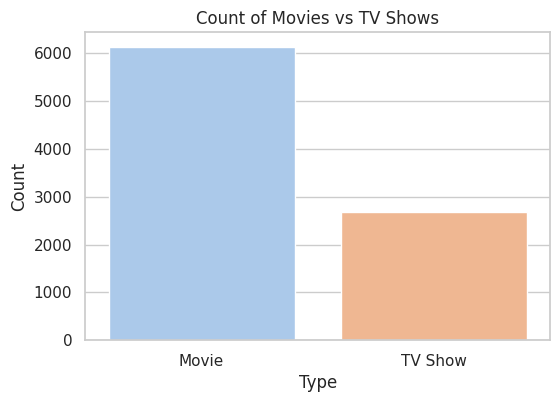

In [13]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x = 'type', palette='pastel', hue='type')
plt.title('Count of Movies vs TV Shows')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

## Top 10 Genres

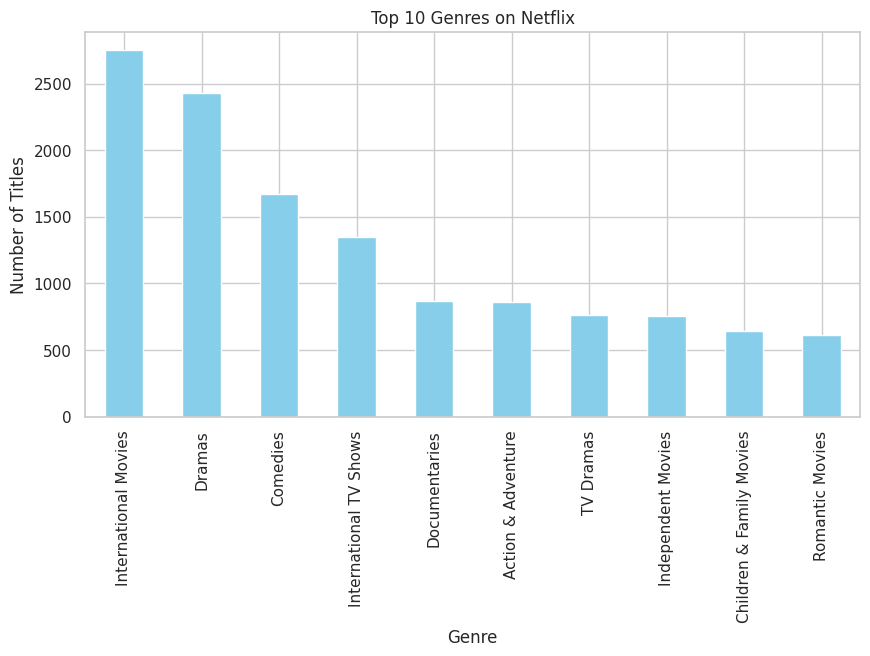

In [14]:
plt.figure(figsize=(10, 5))
df['listed_in'].str.split(', ', expand = True).stack().value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title("Top 10 Genres on Netflix")
plt.xlabel('Genre')
plt.ylabel('Number of Titles')
plt.show()

## Count added over year

In [15]:
df['year_added'] = df['date_added'].dt.year
df['year_added']

0       2021
1       2021
2       2021
3       2021
4       2021
        ... 
8802    2019
8803    2019
8804    2019
8805    2020
8806    2019
Name: year_added, Length: 8807, dtype: int32

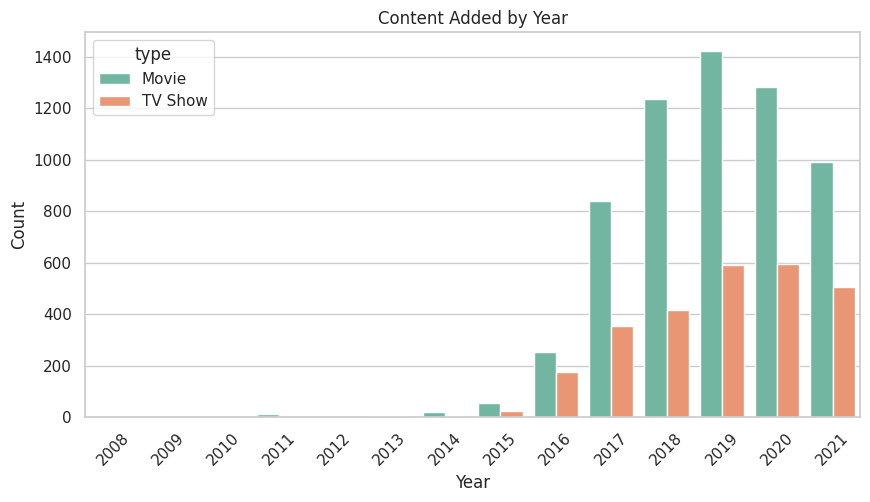

In [16]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x= 'year_added', hue='type', palette='Set2')
plt.title("Content Added by Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.xticks(rotation= 45)
plt.show()

## Top 10 countries with most contents

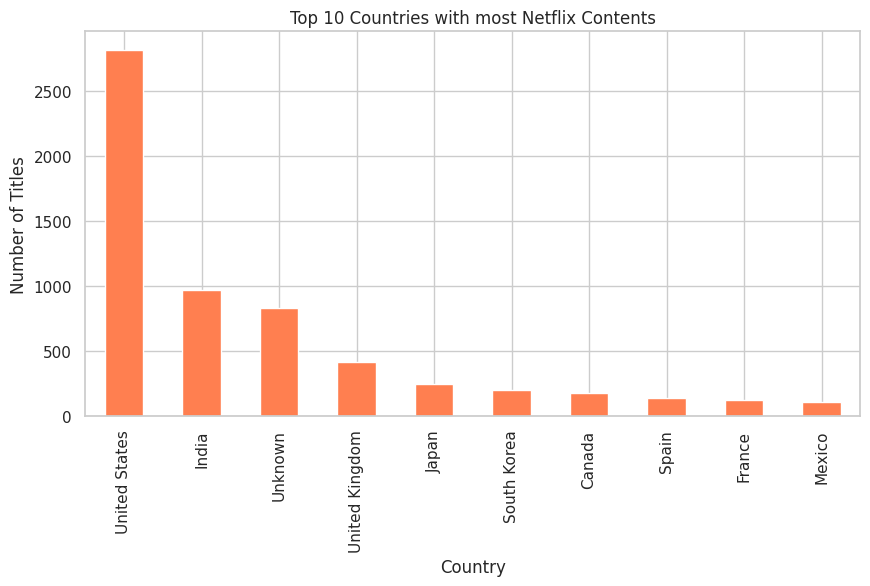

In [17]:
plt.figure(figsize=(10, 5))
df['country'].value_counts().head(10).plot(kind= 'bar', color= 'coral')
plt.title("Top 10 Countries with most Netflix Contents")
plt.xlabel("Country")
plt.ylabel("Number of Titles")
plt.show()

## Content rating distribution

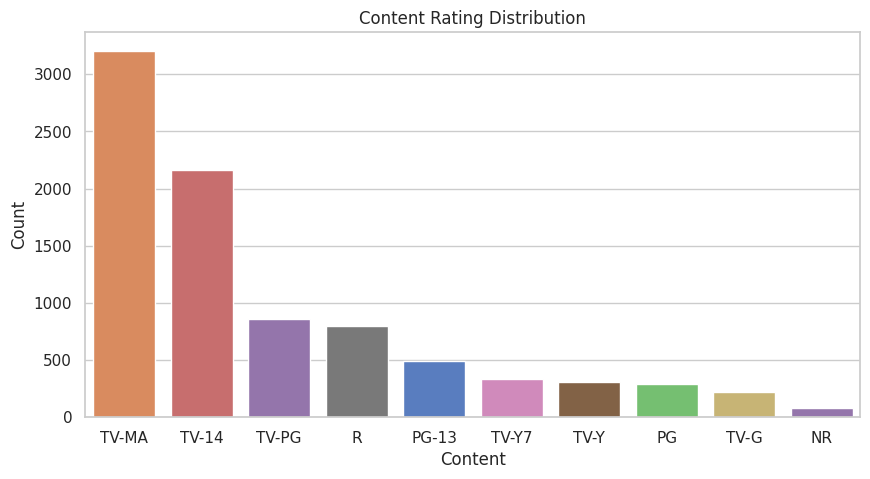

In [18]:
plt.figure(figsize=(10, 5))
sns.countplot(data= df, x = 'rating', order=df['rating'].value_counts().index[:10], palette='muted', hue='rating', legend=False)
plt.title('Content Rating Distribution')
plt.xlabel('Content')
plt.ylabel('Count')
plt.show()

## WordCloud of Titles

In [19]:
pip install wordcloud


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [20]:
from wordcloud import WordCloud

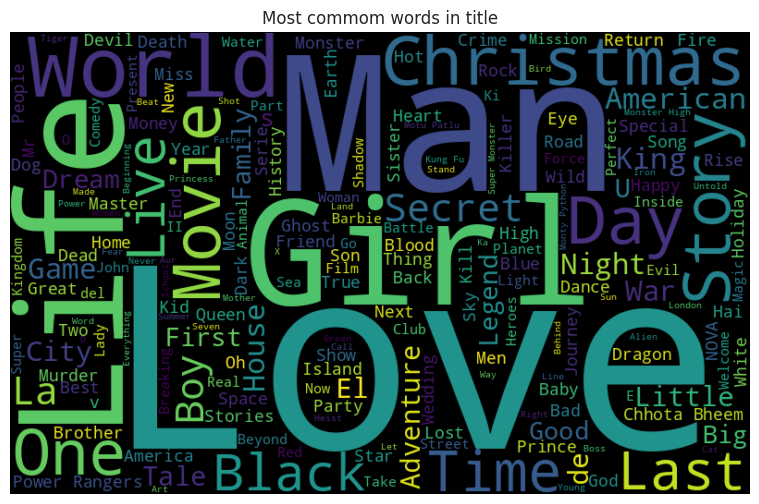

In [21]:
text = " ".join(df['title'])
plt.figure(figsize=(10, 6))
wordcloud = WordCloud(width=800, height=500,background_color= 'black').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most commom words in title')
plt.show()

## Top 10 most frequent actor

In [22]:
actors = df['cast'].dropna().str.split(', ').explode()
top_actors = actors.value_counts().head(10)
top_actors = top_actors.drop('Unknown')

In [23]:
top_actors

cast
Anupam Kher         43
Shah Rukh Khan      35
Julie Tejwani       33
Naseeruddin Shah    32
Takahiro Sakurai    32
Rupa Bhimani        31
Akshay Kumar        30
Om Puri             30
Yuki Kaji           29
Name: count, dtype: int64

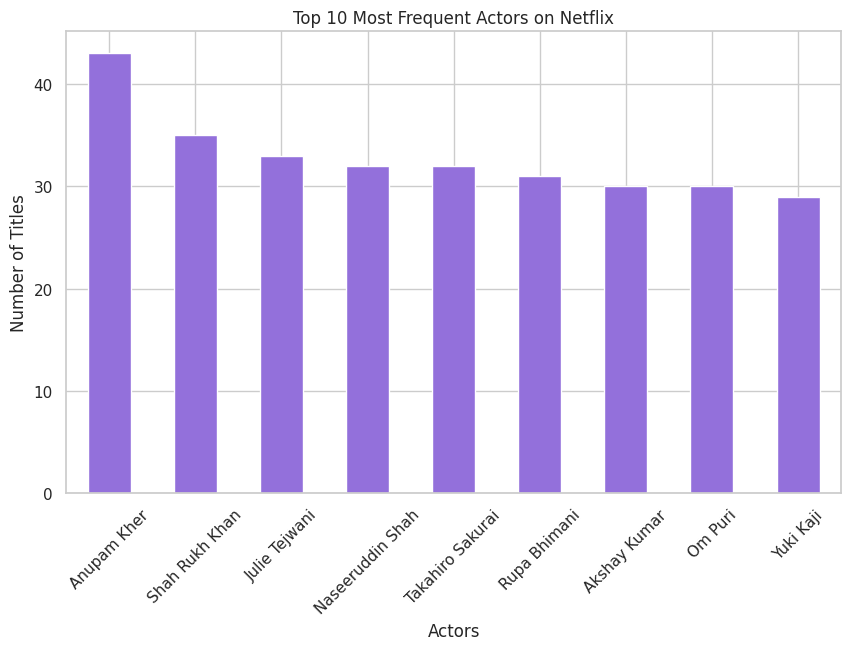

In [24]:
plt.figure(figsize=(10, 6))
top_actors.plot(kind= 'bar', color = 'mediumpurple')
plt.title('Top 10 Most Frequent Actors on Netflix')
plt.xlabel('Actors')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()

## Top 10 most frequent directors

In [25]:
top_directors = df['director'].dropna().value_counts().head(10)
top_directors = top_directors.drop('Unknown')

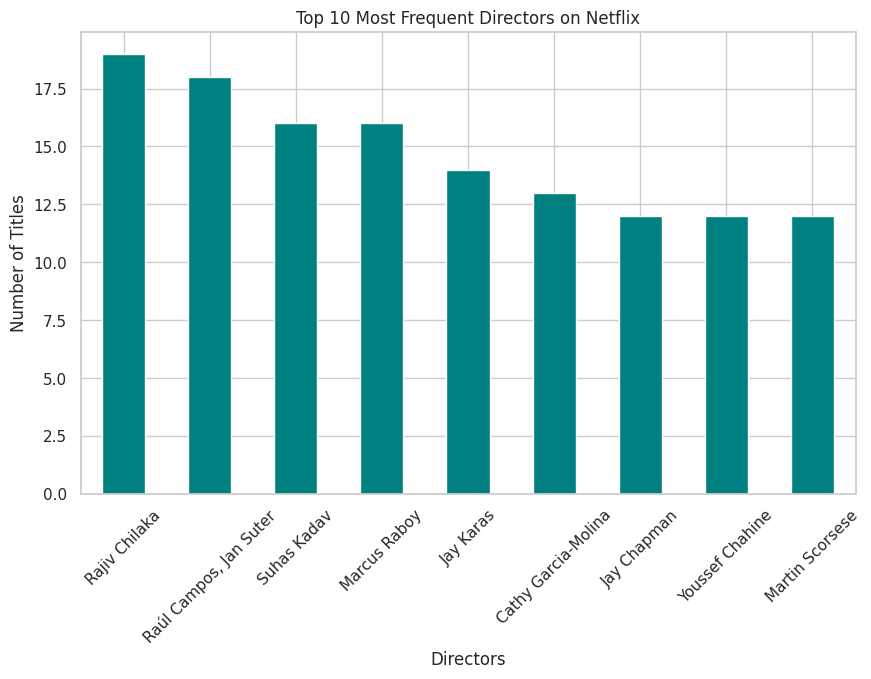

In [26]:
plt.figure(figsize=(10, 6))
top_directors.plot(kind= 'bar', color='teal')
plt.title("Top 10 Most Frequent Directors on Netflix")
plt.xlabel("Directors")
plt.ylabel("Number of Titles")
plt.xticks(rotation= 45)
plt.show()

## movie duration distributon

In [27]:
# for movies
movie_df = df[df['type'] == 'Movie'].copy()
movie_df['duration_int'] = movie_df['duration'].str.extract('(\d+)').astype(float)

<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_7447/4193037314.py:3: SyntaxWarning: invalid escape sequence '\d'
  movie_df['duration_int'] = movie_df['duration'].str.extract('(\d+)').astype(float)


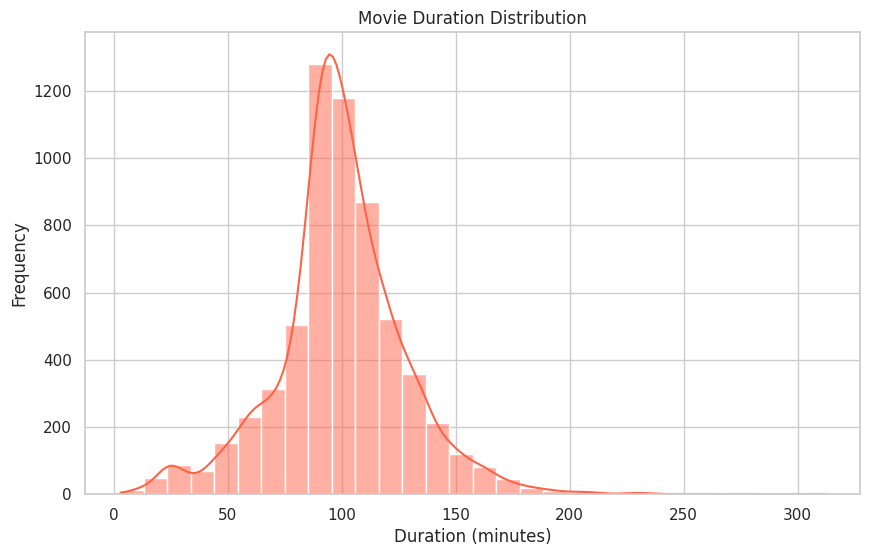

In [28]:
plt.figure(figsize=(10, 6))
sns.histplot(movie_df['duration_int'], bins= 30, kde = True, color= 'tomato')
plt.title('Movie Duration Distribution')
plt.xlabel("Duration (minutes)")
plt.ylabel('Frequency')
plt.show()

In [29]:
# for TV Show
tv_df = df[df['type'] == 'TV Show'].copy()
tv_df['season_count'] = tv_df['duration'].str.extract('(\d+)').astype(int)

<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_7447/1308598966.py:3: SyntaxWarning: invalid escape sequence '\d'
  tv_df['season_count'] = tv_df['duration'].str.extract('(\d+)').astype(int)


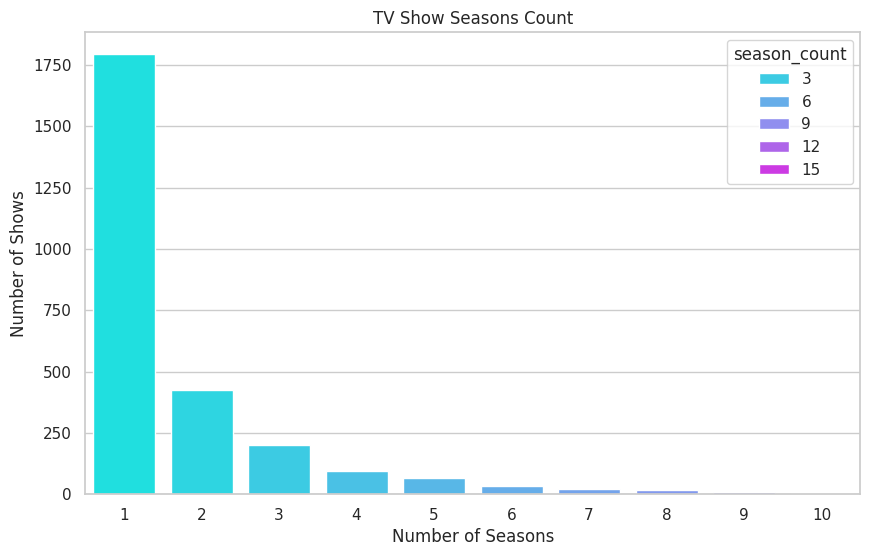

In [30]:
plt.figure(figsize=(10, 6))
sns.countplot(x = 'season_count', data= tv_df, palette='cool', order=tv_df['season_count'].value_counts().index[:10], hue='season_count')
plt.title('TV Show Seasons Count')
plt.xlabel('Number of Seasons')
plt.ylabel('Number of Shows')
plt.show()

## Time Series: Monthly Release Trend

In [31]:
df['monthly_added'] = df['date_added'].dt.to_period('M')

In [32]:
monthly_trend = df.groupby(['monthly_added', 'type']).size().unstack().fillna(0)

<Figure size 1400x600 with 0 Axes>

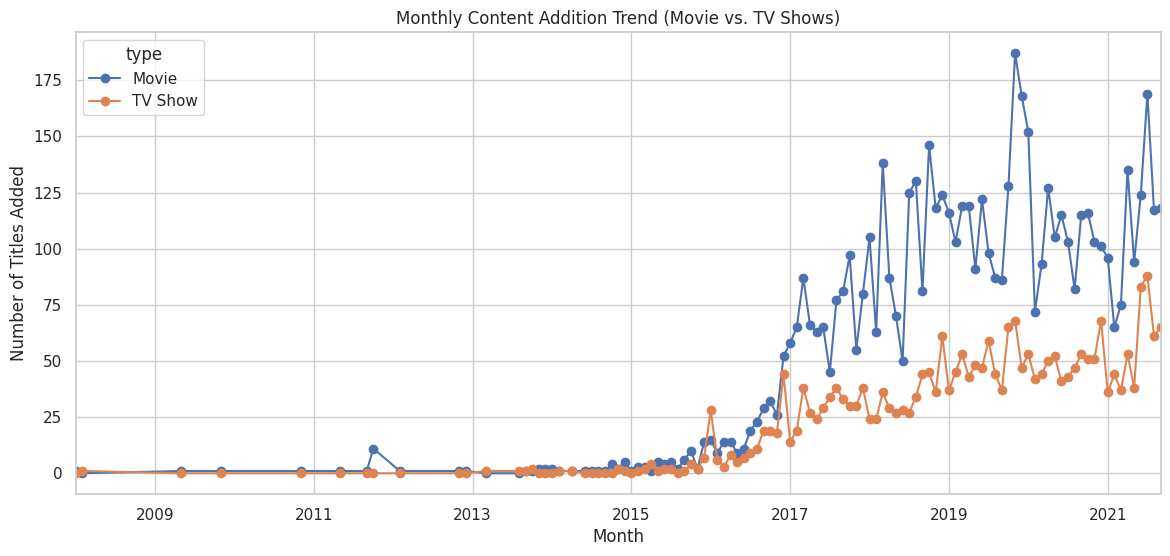

In [33]:
plt.figure(figsize=(14, 6))
monthly_trend.plot(kind= 'line', figsize= (14, 6), marker= 'o')
plt.title('Monthly Content Addition Trend (Movie vs. TV Shows)')
plt.xlabel('Month')
plt.ylabel('Number of Titles Added')
plt.grid(True) 
plt.show()

## Genre vs. Rating Heatmap

In [34]:
genre_df = df[['listed_in', 'rating']].dropna().copy()

In [35]:
genre_df['genre'] = genre_df['listed_in'].str.split(', ')
genre_df = genre_df.explode('genre')

In [36]:
genre_rating_pivot = pd.pivot_table(
    genre_df,
    index='genre', 
    columns='rating', 
    aggfunc='size', 
    fill_value=0
)

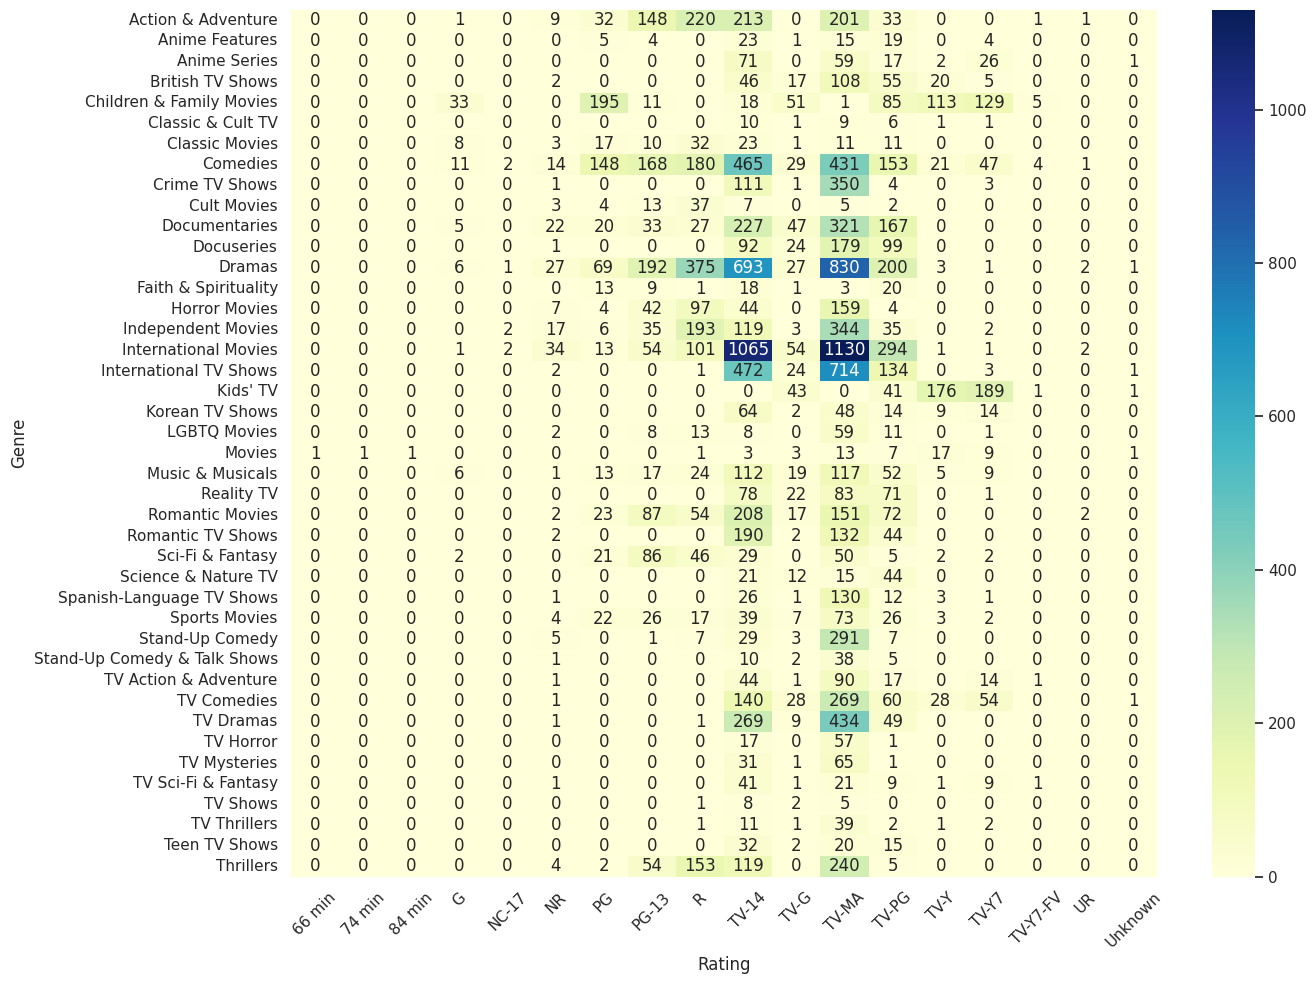

In [37]:
plt.figure(figsize=(14, 10))
sns.heatmap(genre_rating_pivot, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Rating')
plt.ylabel('Genre')
plt.xticks(rotation= 45)
plt.yticks(rotation = 0)
plt.tight_layout() 
plt.show()